<a href="https://colab.research.google.com/github/034adarsh/Stock-Price-Prediction-Using-LSTM/blob/main/LSTM_Improved_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---



In [36]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [37]:


START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [38]:
data = load_data('AAPL')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505280,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516527,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412872,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401018,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443573,447610800


In [39]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


Visualizing Closing Price

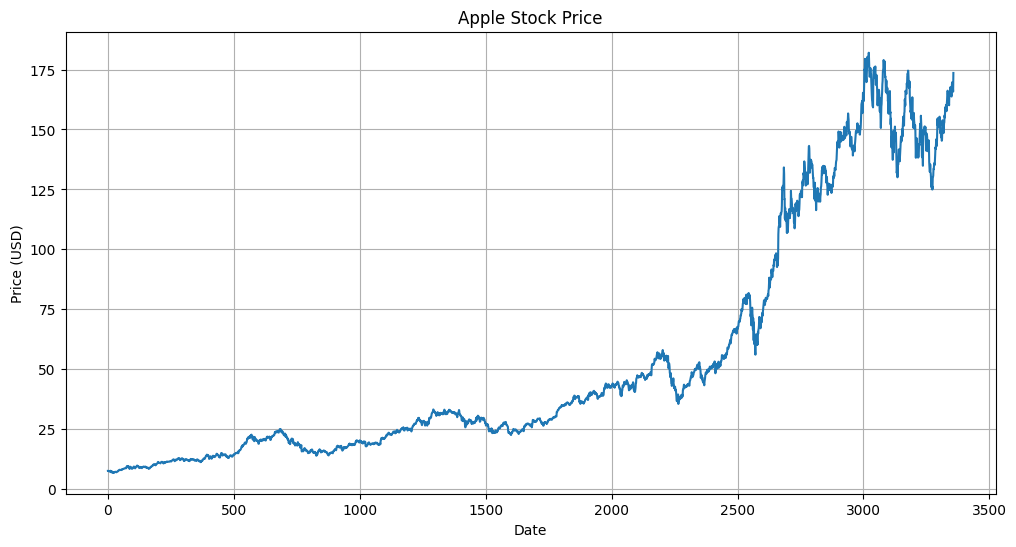

In [111]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("Apple Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()

In [41]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3353,169.279999,170.449997,168.639999,169.589996,52472900
3354,170.089996,170.350006,167.539993,168.539993,48425700
3355,169.500000,170.919998,167.160004,167.449997,65136000
3356,164.889999,167.039993,164.309998,165.789993,81235400


# Plotting moving averages of 100 day

---



In [42]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3353    149.0629
3354    149.3192
3355    149.5843
3356    149.8157
3357    150.1298
Name: Close, Length: 3358, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

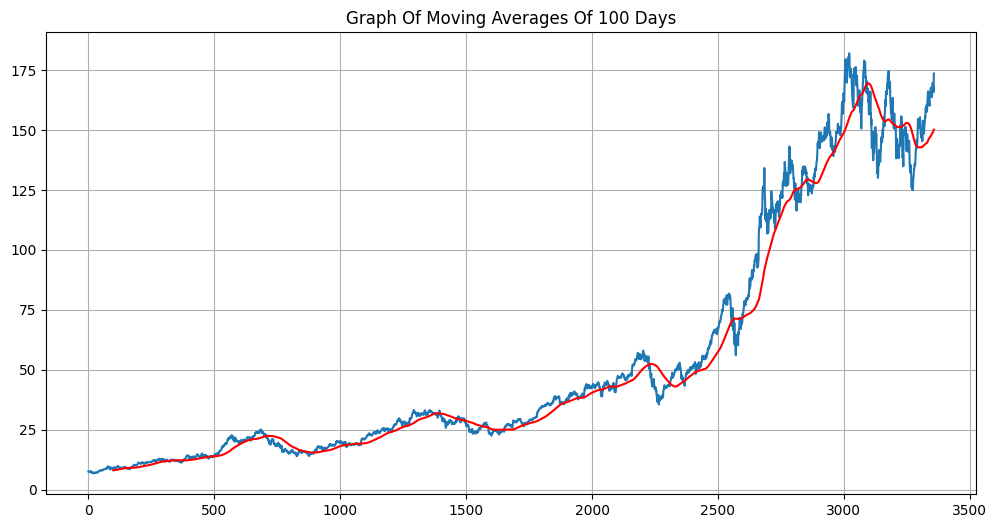

In [112]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [44]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3353    151.001850
3354    151.093700
3355    151.195599
3356    151.269549
3357    151.372200
Name: Close, Length: 3358, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

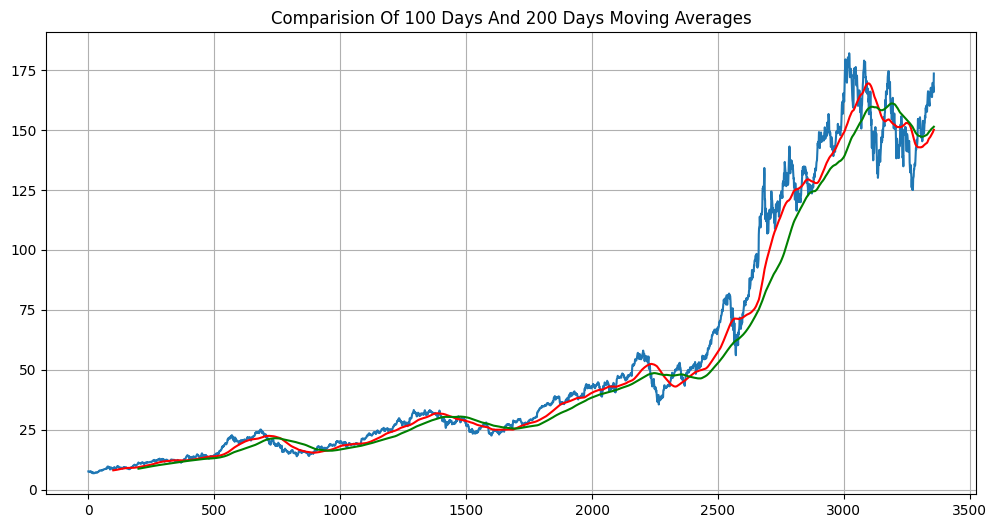

In [113]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [46]:
df.shape

(3358, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [47]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2350, 7)
(1008, 7)


In [48]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505280,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516527,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412872,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401018,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443573,447610800


In [49]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2350,2019-05-07,51.470001,51.855000,50.207500,50.715000,49.083878,155054800
2351,2019-05-08,50.474998,51.334999,50.437500,50.724998,49.093552,105358000
2352,2019-05-09,50.099998,50.419998,49.165001,50.180000,48.566082,139634400
2353,2019-05-10,49.355000,49.712502,48.192501,49.294998,47.893276,164834800
2354,2019-05-13,46.927502,47.369999,45.712502,46.430000,45.109737,229722400


# Using MinMax scaler for normalization of the dataset

---



In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [51]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [52]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.88799525],
       [0.90070087],
       [0.88472112]])

In [53]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [54]:
x_train.shape

(2250, 100, 1)

# ML Model (LSTM)

---



In [55]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [56]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

# Training the model

---



In [89]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
71/71 [==============================] - 52s 642ms/step - loss: 0.0026 - mean_absolute_error: 0.0372
Epoch 2/100
71/71 [==============================] - 47s 660ms/step - loss: 0.0023 - mean_absolute_error: 0.0359
Epoch 3/100
71/71 [==============================] - 47s 663ms/step - loss: 0.0021 - mean_absolute_error: 0.0338
Epoch 4/100
71/71 [==============================] - 47s 662ms/step - loss: 0.0024 - mean_absolute_error: 0.0358
Epoch 5/100
71/71 [==============================] - 47s 662ms/step - loss: 0.0024 - mean_absolute_error: 0.0354
Epoch 6/100
71/71 [==============================] - 45s 638ms/step - loss: 0.0022 - mean_absolute_error: 0.0342
Epoch 7/100
71/71 [==============================] - 45s 641ms/step - loss: 0.0020 - mean_absolute_error: 0.0329
Epoch 8/100
71/71 [==============================] - 45s 634ms/step - loss: 0.0020 - mean_absolute_error: 0.0333
Epoch 9/100
71/71 [==============================] - 45s 635ms/step - loss: 0.0021 - mean_absolu

In [90]:
model.save('keras_model.h5')

In [91]:

test_close.shape
test_close

array([[ 50.71500015],
       [ 50.72499847],
       [ 50.18000031],
       ...,
       [167.44999695],
       [165.78999329],
       [173.57000732]])

In [92]:
past_100_days = pd.DataFrame(train_close[-100:])

In [93]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [94]:
final_df = past_100_days.append(test_df, ignore_index = True)

<ipython-input-94-50640d85f7a0>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(test_df, ignore_index = True)


In [95]:
final_df.head()

,0
0,42.157501
1,42.275002
2,42.737499
3,41.369999
4,40.985001


In [96]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.04513101],
       [0.04593327],
       [0.04909106],
       ...,
       [0.9005889 ],
       [0.88925492],
       [0.94237441]])

In [97]:
input_data.shape

(1108, 1)

# Testing the model

---



In [98]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [99]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1008, 100, 1)
(1008,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [100]:
# Making predictions

y_pred = model.predict(x_test)

32/32 [==============================] - 2s 56ms/step


In [101]:
y_pred.shape

(1008, 1)

In [102]:
y_test

array([0.10355893, 0.1036272 , 0.09990612, ..., 0.9005889 , 0.88925492,
       0.94237441])

In [103]:
y_pred

array([[0.14284034],
       [0.14378835],
       [0.14463043],
       ...,
       [0.8400806 ],
       [0.83989406],
       [0.8374085 ]], dtype=float32)

In [104]:
scaler.scale_

array([0.00682769])

In [105]:
scale_factor = 1/0.00985902
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

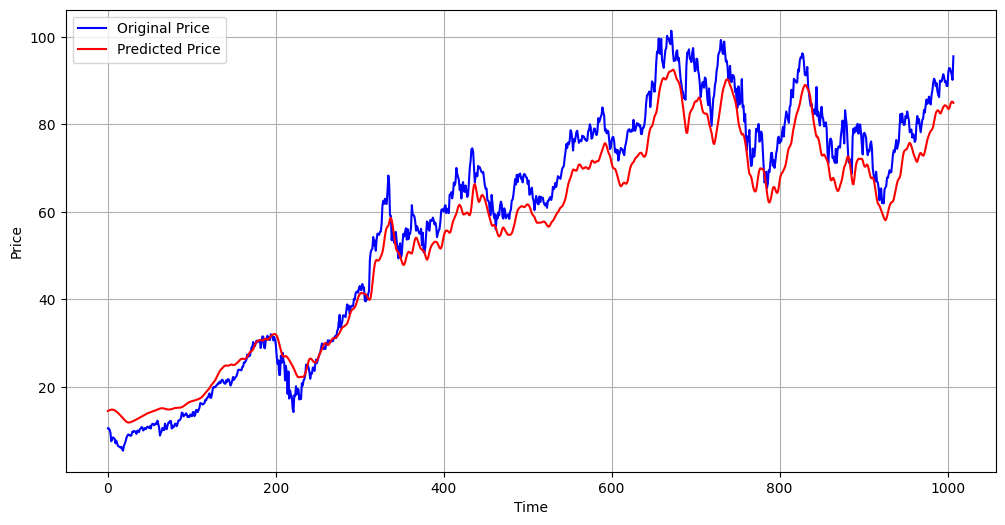

In [114]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [107]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error on test set: ", mae)

Mean absolute error on test set:  5.305085730873939


Calculation of R2 score

In [108]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9480952293626004


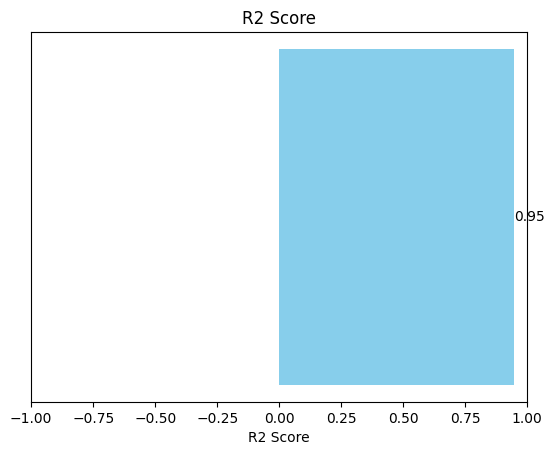

In [117]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

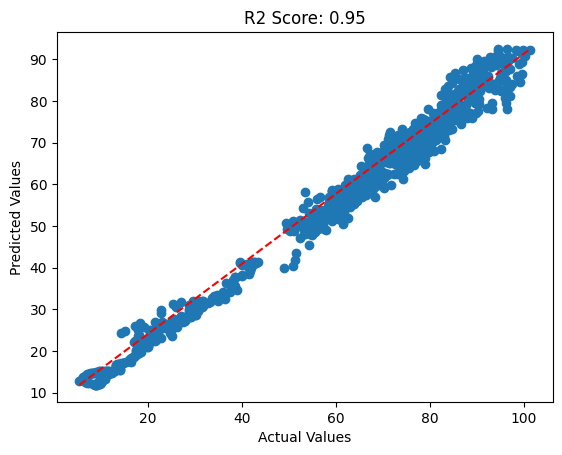

In [123]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()